In [29]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import sklearn as skl
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

#  Import and read the charity_data.csv.
import pandas as pd 
df = pd.read_csv("resources/diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [2]:
df.nunique()

Diabetes_binary          2
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     80
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
dtype: int64

In [3]:
df['Diabetes_binary'].value_counts()

0.0    35346
1.0    35346
Name: Diabetes_binary, dtype: int64

In [4]:
list(df.columns)

['Diabetes_binary',
 'HighBP',
 'HighChol',
 'CholCheck',
 'BMI',
 'Smoker',
 'Stroke',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'Fruits',
 'Veggies',
 'HvyAlcoholConsump',
 'AnyHealthcare',
 'NoDocbcCost',
 'GenHlth',
 'MentHlth',
 'PhysHlth',
 'DiffWalk',
 'Sex',
 'Age',
 'Education',
 'Income']

In [5]:
scaled = StandardScaler().fit_transform(df[['HighBP','HighChol','CholCheck','BMI','Smoker','Stroke',
    'HeartDiseaseorAttack','PhysActivity','Fruits','Veggies',
    'HvyAlcoholConsump','AnyHealthcare','NoDocbcCost','GenHlth',
    'MentHlth','PhysHlth','DiffWalk','Sex','Age','Education','Income']])
print(scaled[0:5])

[[ 0.88020109 -1.05279808  0.15927581 -0.54217564 -0.95171054 -0.25747348
  -0.41647033  0.64992528 -1.25537143  0.51748481 -0.21125109  0.21717454
  -0.32194493  0.1463042   0.15301974  2.40400793 -0.58155367  1.09004602
  -1.60723742  1.04856175  1.05815996]
 [ 0.88020109  0.94984976  0.15927581 -0.54217564  1.05073965  3.88389516
  -0.41647033 -1.53863842  0.79657699 -1.93242386 -0.21125109  0.21717454
  -0.32194493  0.1463042  -0.46005828 -0.57745057 -0.58155367  1.09004602
   1.19768093  1.04856175  1.05815996]
 [-1.13610402 -1.05279808  0.15927581 -0.54217564 -0.95171054 -0.25747348
  -0.41647033  0.64992528  0.79657699  0.51748481 -0.21125109  0.21717454
  -0.32194493 -1.64974275 -0.46005828  0.41636893 -0.58155367  1.09004602
   1.54829572  1.04856175  1.05815996]
 [ 0.88020109  0.94984976  0.15927581 -0.26103604  1.05073965 -0.25747348
  -0.41647033  0.64992528  0.79657699  0.51748481 -0.21125109  0.21717454
  -0.32194493  0.1463042  -0.46005828 -0.27930472 -0.58155367  1.0900

In [6]:
# Create a DataFrame with the scaled data
scaled = pd.DataFrame(scaled, columns=['HighBP','HighChol','CholCheck','BMI','Smoker','Stroke',
    'HeartDiseaseorAttack','PhysActivity','Fruits','Veggies',
    'HvyAlcoholConsump','AnyHealthcare','NoDocbcCost','GenHlth',
    'MentHlth','PhysHlth','DiffWalk','Sex','Age','Education','Income'])


# Copy the crypto names from the original data
scaled_copy = scaled.copy()

# Display sample data
print(scaled_copy)

         HighBP  HighChol  CholCheck       BMI    Smoker    Stroke  \
0      0.880201 -1.052798   0.159276 -0.542176 -0.951711 -0.257473   
1      0.880201  0.949850   0.159276 -0.542176  1.050740  3.883895   
2     -1.136104 -1.052798   0.159276 -0.542176 -0.951711 -0.257473   
3      0.880201  0.949850   0.159276 -0.261036  1.050740 -0.257473   
4     -1.136104 -1.052798   0.159276 -0.120466  1.050740 -0.257473   
...         ...       ...        ...       ...       ...       ...   
70687 -1.136104  0.949850   0.159276  1.004092 -0.951711 -0.257473   
70688 -1.136104  0.949850   0.159276 -0.120466  1.050740 -0.257473   
70689  0.880201  0.949850   0.159276 -0.682745 -0.951711 -0.257473   
70690  0.880201  0.949850   0.159276 -1.666734 -0.951711 -0.257473   
70691  0.880201  0.949850   0.159276 -0.682745 -0.951711 -0.257473   

       HeartDiseaseorAttack  PhysActivity    Fruits   Veggies  ...  \
0                 -0.416470      0.649925 -1.255371  0.517485  ...   
1                 -

In [7]:
y = df['Diabetes_binary']
X = scaled

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [8]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [9]:
# Create a method that creates a new Sequential model with hyperparameter options
input_dimension = X_train_scaled.shape[1]

def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh','sigmoid'])
    
    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=10,
        step=2), activation=activation, input_dim=input_dimension))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 6)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=10,
            step=2),
            activation=activation))
    
    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn_model

In [10]:
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=100,
    overwrite=True,
    hyperband_iterations=2)

In [11]:
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=100,
    overwrite=True,
    hyperband_iterations=2)

In [12]:
# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=20,validation_data=(X_test_scaled,y_test))

Trial 126 Complete [00h 00m 14s]
val_accuracy: 0.745374321937561

Best val_accuracy So Far: 0.7529565095901489
Total elapsed time: 00h 25m 45s

Search: Running Trial #127

Value             |Best Value So Far |Hyperparameter
sigmoid           |relu              |activation
1                 |9                 |first_units
4                 |1                 |num_layers
7                 |3                 |units_0
9                 |1                 |units_1
9                 |1                 |units_2
9                 |1                 |units_3
7                 |5                 |units_4
1                 |7                 |units_5
4                 |4                 |tuner/epochs
2                 |2                 |tuner/initial_epoch
4                 |4                 |tuner/bracket
1                 |1                 |tuner/round
0070              |0052              |tuner/trial_id

Epoch 3/4
1418/1657 [========================>.....] - ETA: 0s - loss: 0.5307 - accura

KeyboardInterrupt: 

In [13]:
# Get best model hyperparameters
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values

{'activation': 'relu',
 'first_units': 9,
 'num_layers': 1,
 'units_0': 3,
 'units_1': 1,
 'units_2': 1,
 'units_3': 1,
 'units_4': 5,
 'units_5': 7,
 'tuner/epochs': 4,
 'tuner/initial_epoch': 2,
 'tuner/bracket': 4,
 'tuner/round': 1,
 'tuner/trial_id': '0052'}

In [14]:
# Evaluate best model against full test data
best_model = tuner.get_best_models(1)[0]
print(best_model.summary())
model_loss, model_accuracy = best_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 9)                 198       
                                                                 
 dense_1 (Dense)             (None, 3)                 30        
                                                                 
 dense_2 (Dense)             (None, 1)                 4         
                                                                 
Total params: 232
Trainable params: 232
Non-trainable params: 0
_________________________________________________________________
None
553/553 - 1s - loss: 0.5036 - accuracy: 0.7530 - 931ms/epoch - 2ms/step
Loss: 0.5036136507987976, Accuracy: 0.7529565095901489


In [15]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=9, activation="relu", input_dim=input_dimension))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="relu"))

# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=50)

# Check the structure of the model
nn.summary()

Epoch 1/50
1657/1657 [==============================] - 4s 2ms/step - loss: 0.9522 - accuracy: 0.6430
Epoch 2/50
1657/1657 [==============================] - 3s 2ms/step - loss: 0.5933 - accuracy: 0.7028
Epoch 3/50
1657/1657 [==============================] - 3s 2ms/step - loss: 0.5573 - accuracy: 0.7316
Epoch 4/50
1657/1657 [==============================] - 3s 2ms/step - loss: 0.5351 - accuracy: 0.7435
Epoch 5/50
1657/1657 [==============================] - 2s 1ms/step - loss: 0.5229 - accuracy: 0.7465
Epoch 6/50
1657/1657 [==============================] - 3s 2ms/step - loss: 0.5171 - accuracy: 0.7482
Epoch 7/50
1657/1657 [==============================] - 3s 2ms/step - loss: 0.5141 - accuracy: 0.7474
Epoch 8/50
1657/1657 [==============================] - 5s 3ms/step - loss: 0.5112 - accuracy: 0.7494
Epoch 9/50
1657/1657 [==============================] - 6s 4ms/step - loss: 0.5106 - accuracy: 0.7498
Epoch 10/50
1657/1657 [==============================] - 4s 2ms/step - loss: 0.509

In [17]:
# Export our model to HDF5 file
best_model.save('diabetes_model-1.h5')

In [18]:
training_process = pd.DataFrame(fit_model.history)

# observe the training process by each epoch
training_process.index += 1

<AxesSubplot:>

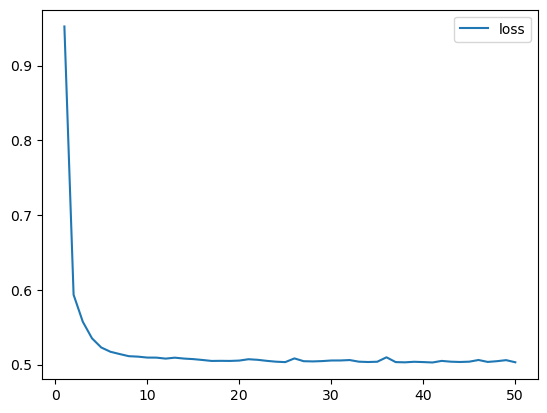

In [19]:
training_process.plot(y='loss')

<AxesSubplot:>

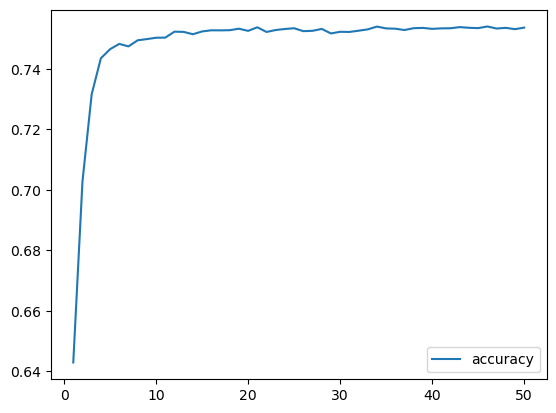

In [20]:
training_process.plot(y='accuracy')

In [26]:
# Export our model to HDF5 file
best_model.save('diabetes_model-1.json')

INFO:tensorflow:Assets written to: diabetes_model-1.json\assets


INFO:tensorflow:Assets written to: diabetes_model-1.json\assets


<AxesSubplot:>

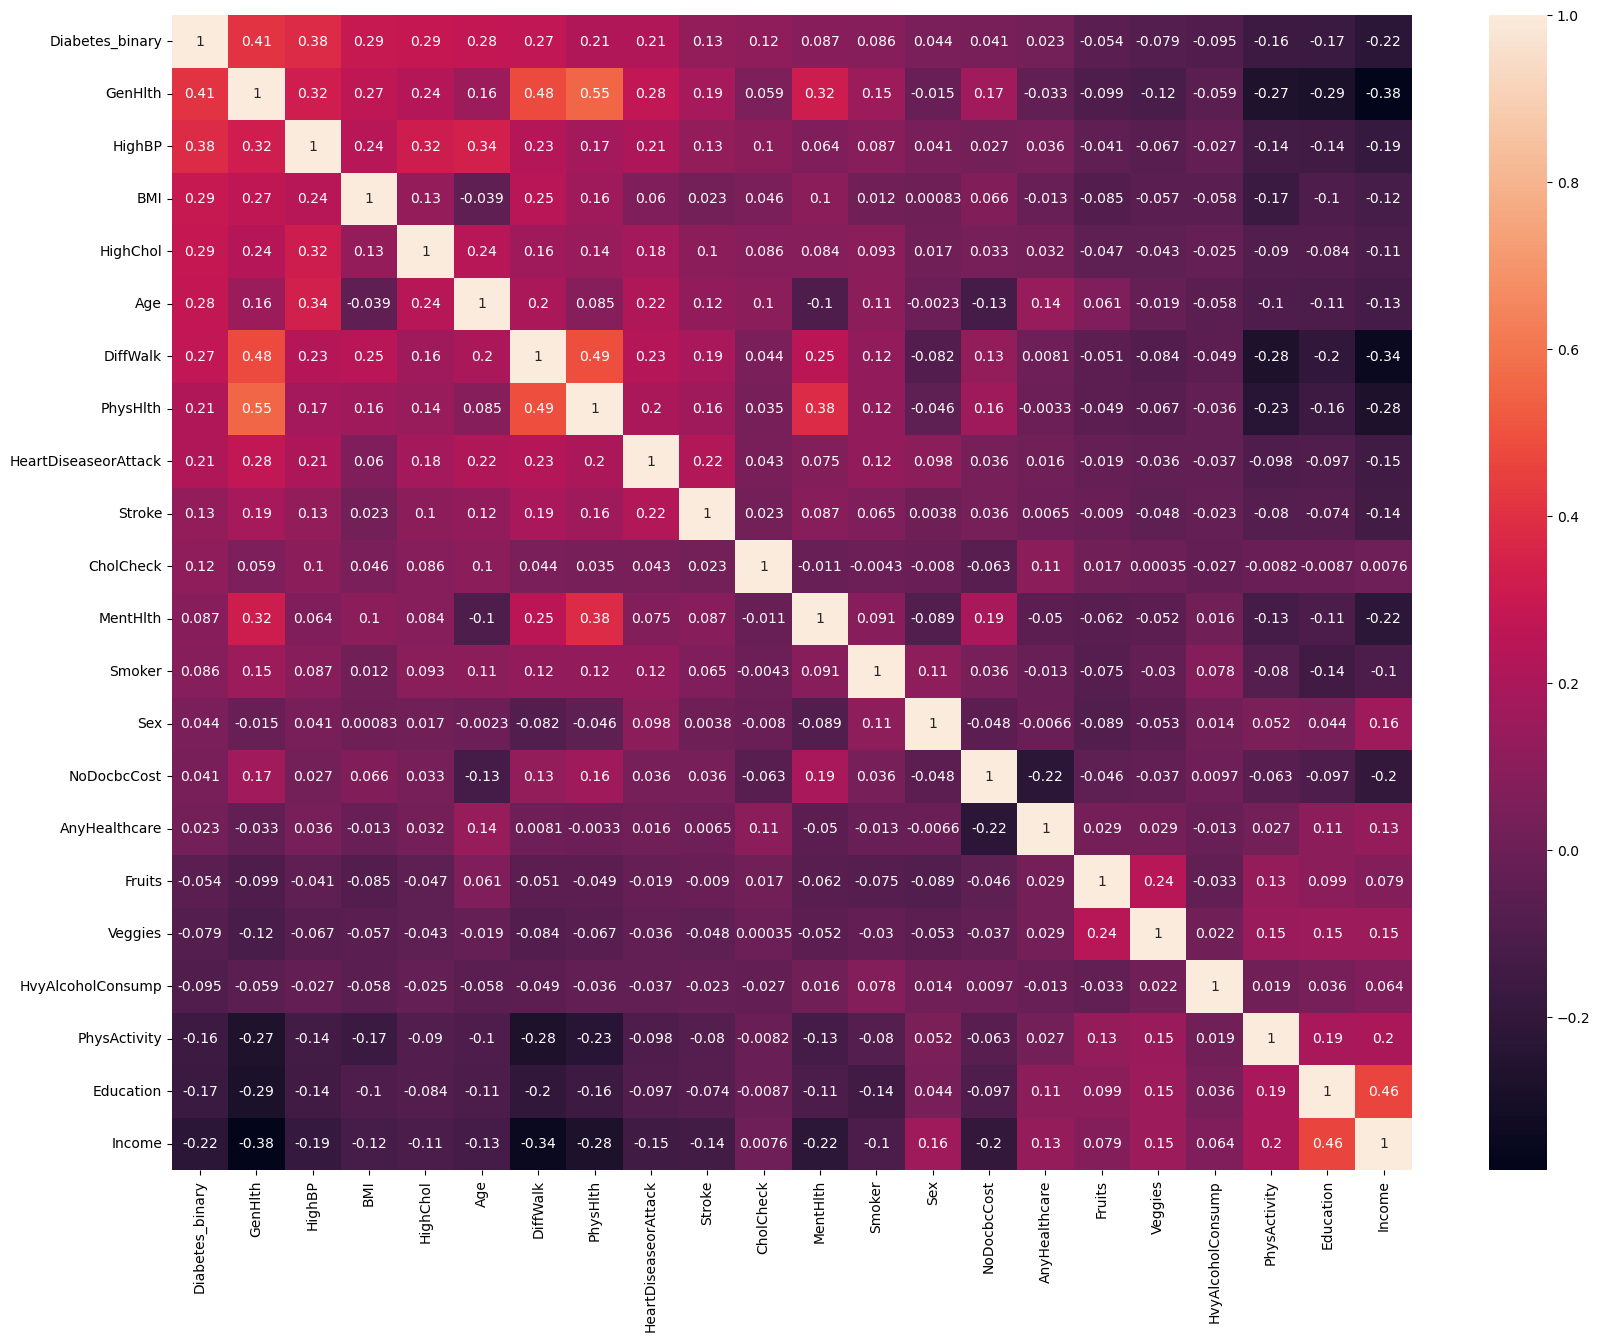

In [30]:
corr=df.corr()
top_corr=df[corr.nlargest(40,'Diabetes_binary')['Diabetes_binary'].index].corr()
figure, ax1 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(20,15)
sns.heatmap(top_corr, annot=True, ax=ax1)